<a href="https://colab.research.google.com/github/sanmope/PracticaDiplo/blob/master/NO_SUP_Practico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

In [13]:
#df=pd.read_csv("https://raw.githubusercontent.com/sanmope/PracticaDiplo/master/AprendizajeNoSupervisado/Practico/players_20.csv")
df=pd.read_csv("./AprendizajeNoSupervisado/Practico/players_20.csv")

df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df.columns)
print(len(df.columns))


Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)
104


<AxesSubplot:>

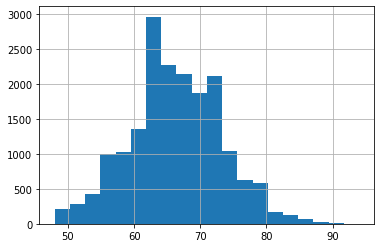

In [15]:
df['overall'].hist(bins = 20)

In [24]:
print("La cantidad de jugadores del dataframe son:",len(df))

La cantidad de jugadores del dataframe son: 18278


In [17]:
df.groupby(df["team_position"])["team_position"].count().sort_values()

team_position
CF       14
RF       19
LF       19
LAM      23
RAM      23
RWB      58
LWB      58
CM       76
CB      100
RW      161
LW      162
CDM     181
RS      195
LS      195
LDM     242
RDM     244
CAM     311
LM      398
RM      399
RCM     411
LCM     411
ST      458
RB      560
LB      560
RCB     660
LCB     660
GK      662
RES    2958
SUB    7820
Name: team_position, dtype: int64

In [18]:
df.preferred_foot.unique()

array(['Left', 'Right'], dtype=object)

In [19]:
is_left_foot = df["preferred_foot"] == "Left"
is_right_foot = df["preferred_foot"] == "Right"

print("Hay" ,len(df[is_left_foot]), "pateadores izquierdos y" ,len(df[is_right_foot]),  "pateadores derechos, con un ratio de" ,round((len(df[is_left_foot])/len(df))*100), "% Zurdos")

Hay  4318 pateadores izquierdos y 13960 pateadores derechos, con un ratio de 24 % Zurdos


In [20]:
df_top_10 = df.groupby(df["nationality"])["nationality"].count().sort_values(ascending = False).head(10)
print("El top ten de paises que mas jugadores aportan a Fifa son:\n" ,df_top_10)

El top ten de paises que mas jugadores aportan a Fifa son:
 nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64


In [21]:
df_overall = df[df["overall"] > 70]


In [22]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go

In [25]:
print("El total de variables numericas de desempeño segun habilidad:", len(df.iloc[:0,31:78].columns))

El total de variables numericas de desempeño segun habilidad: 47


In [26]:
skills_ratings = df.iloc[:0,31:78].columns
skills_ratings = skills_ratings.drop('player_traits')
skills_ratings

Index(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning',

In [27]:
MachineGunDict={'long_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_overall=df_overall.append(MachineGunDict,ignore_index=True)

In [28]:
df_skills = df_overall[skills_ratings]

In [29]:
df_skills

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,...,75,96,33,37,26,6,11,15,14,8
1,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,...,85,95,28,32,24,7,11,15,14,11
2,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,...,90,94,27,26,29,9,9,15,15,11
3,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,...,11,68,27,12,18,87,92,78,90,89
4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752,64.0,71.0,62.0,73.0,33.0,71.0,NaN,NaN,NaN,NaN,...,70,71,18,33,36,8,8,10,12,12
4753,58.0,60.0,70.0,68.0,68.0,73.0,NaN,NaN,NaN,NaN,...,61,69,69,71,65,10,7,12,13,8
4754,64.0,59.0,62.0,67.0,72.0,74.0,NaN,NaN,NaN,NaN,...,61,69,71,73,72,6,10,9,11,7
4755,64.0,49.0,61.0,63.0,69.0,73.0,NaN,NaN,NaN,NaN,...,41,61,65,70,68,6,8,10,14,7


In [36]:

data=[]

bool_crack = df["overall"] > 90 # definimos los mejores jugadores 

#Elejimos dos variables, para esto elejimos dos números entre 0 y de n_skills-1
skill_1='power_strength'
skill_2='power_long_shots'



graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_overall.loc[:,'team_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_overall.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Clustering Kmeans

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
df_skills_standar_1 = scaler.fit(df_skills)
df_skills_standar_2 = scaler.transform(df_skills)

In [32]:
n=10000

df_n = df.loc[:n]
df_n = df_n[(df_n["overall"] >70)]


skills_ratings =  ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

df_skills = df_n[skills_ratings]

In [33]:
df_skills

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,88,95,70,92,88,97,93,94,92,96,...,75,96,33,37,26,6,11,15,14,8
1,84,94,89,83,87,89,81,76,77,92,...,85,95,28,32,24,7,11,15,14,11
2,87,87,62,87,87,96,88,87,81,95,...,90,94,27,26,29,9,9,15,15,11
3,13,11,15,43,13,12,13,14,40,30,...,11,68,27,12,18,87,92,78,90,89
4,81,84,61,89,83,95,83,79,83,94,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,58,70,54,68,59,64,62,41,65,73,...,55,76,34,52,46,12,12,16,7,8
4752,57,71,66,64,75,74,67,68,58,75,...,70,71,18,33,36,8,8,10,12,12
4753,70,53,61,70,51,69,70,53,77,68,...,61,69,69,71,65,10,7,12,13,8
4754,58,54,68,66,50,67,49,53,64,69,...,61,69,71,73,72,6,10,9,11,7


In [47]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 10

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  9048753.757951526


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

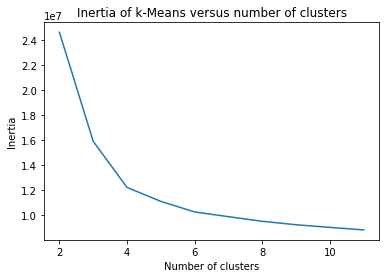

In [48]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [37]:
df_skills_crack = df_n.copy()
df_skills_crack['short_name'] = df_n.short_name
df_skills_crack = df_skills_crack[df_skills_crack.overall > 85]
names = df_skills_crack.short_name.tolist()
df_skills_crack = df_skills_crack.drop(['short_name'], axis = 1) # drop long name

df_skills_crack = df_skills_crack[df_skills.columns.to_list()]

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
x = df_skills_crack.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

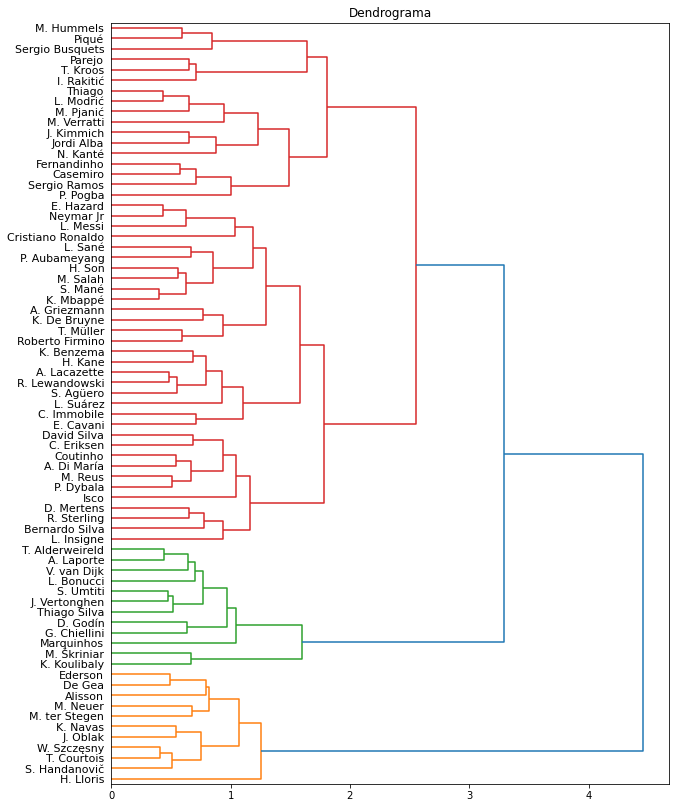

In [39]:
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Dendrograma')

dendrogram = sch.dendrogram(sch.linkage(df_norm, method="complete"), 
                            labels= names, leaf_font_size = 11, 
                            orientation='right')

In [40]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [41]:
df_clusters=df_skills.copy()
df_clusters['cluster'] = km.labels_ #clusters
print('Kmeans encontró:', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró: 4 clusters, nosotros forzamos la cantidad


In [42]:
from collections import Counter
print('Cantidad de datos por cluster con kmedias: ',Counter(km.labels_))

Cantidad de datos por cluster con kmedias:  Counter({1: 1715, 0: 1644, 3: 957, 2: 440})


In [43]:
df_skills_kmeans = df_skills.copy()
df_skills_kmeans['cluster'] = km.labels_
#df_skills_kmeans['team_position_general'] = df_n.team_position_general

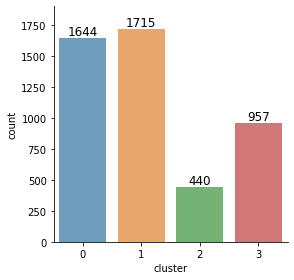

In [44]:
import seaborn as sns
import math

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

sns.factorplot('cluster', data=df_skills_kmeans, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df_skills_kmeans['cluster'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')

plt.show()

In [45]:
#Eliminamos posisiones suplentes y reservas, ya que entendemos que sus posiciones en el equipo pueden no estar definidas
df_n=df_n[~((df.team_position == 'RES') | (df_n.team_position == 'SUB'))]

#Para lograr separar las diferentes posiciones, creamos la columna que quita granularidad a las posiciones
FW=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
MF=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
DEF=['RCB','CB','LCB','LB','RB','RWB','LWB']
GK=['GK']

#Alternativa 1: Usar un diccionario

posiciones = {'RF':'FW','ST':'FW', 'LW':'FW', 'LF':'FW', 'RS':'FW', 'LS':'FW', 'RM':'FW', 'LM':'FW','RW':'FW',
        'RCM':'MF','LCM':'MF','LDM':'MF','CAM':'MF','CDM':'MF','LAM':'MF','RDM':'MF','CM':'MF','RAM':'MF','CF':'MF',
        'RCB':'DEF','CB':'DEF','LCB':'DEF','LB':'DEF','RB':'DEF','RWB':'DEF','LWB':'DEF',
        'GK':'GK'}

df_n['team_position_general'] = df_n['team_position'].apply(lambda x : posiciones.get(x))


#Creamos una variable numérica para determinar la posición general del jugador según su club.

def pos_num(position):
    if position == 'FW':
        return 0
    elif position == 'MF':
        return 1
    elif position == 'DEF':
        return 2
    elif position == 'GK':
        return 3
    else:
        return 'nan'
    
df_n["team_position_num"]=df_n["team_position_general"].apply(lambda x: pos_num(x))
df_n=df_n[~(df_n.team_position_num == 'nan')]

In [46]:
for cluster in np.sort(df_skills_kmeans.cluster.unique()):
    
    sns.factorplot(df_n["team_position_general"], data=df_skills_kmeans[df_skills_kmeans.cluster == cluster],
                   kind='count', alpha=0.7, size=4, aspect=1)

    # Get current axis on current figure
    ax = plt.gca()

    # ylim max value to be set
    y_max = df_skills_kmeans['cluster'].value_counts().max() 
    ax.set_ylim([0, roundup(y_max)])

    # Iterate through the list of axes' patches
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12,  ha='center', va='bottom')
    
    plt.ylabel('Count')
    plt.xlabel("Player's position")
    plt.title("Player's position count in cluster " '%s' % (cluster))
    plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [26]:
# Se agrupan los datos usando Kmedias en 4 clusters (cantidad elegida según el criterio del codo)
km.fit(df_skills)
df_clusters=df_skills.copy()
df_clusters['kmeans'] = km.labels_
df_clusters.head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,kmeans
0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,2
1,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2
2,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2
3,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1
4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,2


### Clustering Mean-Shift

In [27]:
##REVISAR, ME ENCUENTRA UN SOLO CLUSTER!
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters


Numero estimado de clusters para Mean Shift : 1


In [28]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'long_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [29]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  1 clusters, según los hiperparámetros elegidos


### Clustering KMean Sin Arqueros

In [30]:
n=10000

df_n = df.loc[:n]
df_n = df_n[(df_n["player_positions"]!='GK')&(df_n['overall']>70)]

skills_ratings =  ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']

df_skills = df_n[skills_ratings]

In [31]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_

In [32]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'long_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering Kmeans ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Clustering Mean-Shift Sin Arqueros

In [33]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition


ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 13


In [34]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'long_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)